In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

### Load the data

Submission file sample

In [27]:
submission_df = pd.read_csv("D://Kaggle/sample_submission/sample_submission.csv")
submission_df.head(3)

,id,target
0,0,0.076951
1,1,0.071001
2,2,0.081515


Training data

In [28]:
train_df = pd.read_csv("D:/Kaggle/train/train.csv")
print(train_df.shape)
print(train_df.head())

(595212, 59)
   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0              0              0              1              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              0              1              0              0       ...         
4              0              1              0              0       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9   

Exploration of target variable

In [29]:
train_df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

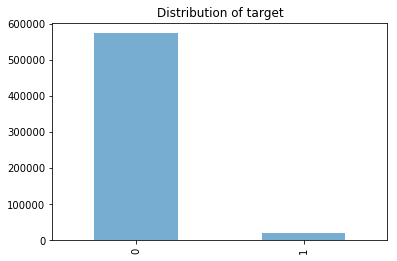

In [30]:

train_df.target.value_counts().plot(kind='bar', alpha=0.6)
plt.title("Distribution of target")

In [31]:
##Check for data types and missing data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

Testing data

In [32]:
test_df = pd.read_csv("D://Kaggle/test/test.csv")
print(test_df.shape)
test_df.head()

(892816, 58)


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

Correlation with the target variable

In [34]:
train_df.corr()['target']

id               -0.000188
target            1.000000
ps_ind_01         0.018570
ps_ind_02_cat     0.004534
ps_ind_03         0.008360
ps_ind_04_cat     0.009360
ps_ind_05_cat     0.029165
ps_ind_06_bin    -0.034017
ps_ind_07_bin     0.034218
ps_ind_08_bin     0.013147
ps_ind_09_bin    -0.008237
ps_ind_10_bin     0.001815
ps_ind_11_bin     0.002028
ps_ind_12_bin     0.007810
ps_ind_13_bin     0.002460
ps_ind_14         0.007443
ps_ind_15        -0.021506
ps_ind_16_bin    -0.027778
ps_ind_17_bin     0.037053
ps_ind_18_bin     0.004555
ps_reg_01         0.022888
ps_reg_02         0.034800
ps_reg_03         0.030888
ps_car_01_cat     0.016256
ps_car_02_cat    -0.031534
ps_car_03_cat     0.032401
ps_car_04_cat     0.032900
ps_car_05_cat     0.020754
ps_car_06_cat     0.011537
ps_car_07_cat    -0.036395
ps_car_08_cat    -0.020342
ps_car_09_cat     0.005322
ps_car_10_cat     0.001038
ps_car_11_cat     0.006129
ps_car_11        -0.001213
ps_car_12         0.038790
ps_car_13         0.053899
p

Preparing the data for modeling: 

training_features - All indepenent variables of training data 

training_targert - Dependent variable for training data

In [35]:
training_features  = train_df.drop(['target', 'id'], axis = 1)
training_features.shape

(595212, 57)

In [36]:
training_target = train_df['target']
print(training_target.shape)

(595212,)


Break the data into training (75%) and validation (25%)

In [37]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, test_size = 0.25, random_state = 12)

In [38]:
print("Train dataframe size for model:", x_train.shape)
print("Validation dataframe size based on model:", x_val.shape)   

Train dataframe size for model: (446409, 57)
Validation dataframe size based on model: (148803, 57)


In [39]:
y_train.shape

(446409,)

Oversampling to balance the data

In [40]:
sm = SMOTE(random_state = 12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

AttributeError: 'NoneType' object has no attribute 'items'

Distribution of the target variable (y_train_res) after applying SMOTE

(array([ 430107.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,  430107.]),
 array([ 0.        ,  0.02083333,  0.04166667,  0.0625    ,  0.08333333,
         0.10416667,  0.125     ,  0.14583333,  0.16666667,  0.1875    ,
         0.20833333,  0.22916667,  0.25      ,  0.27083333,  0.29166667,
         0.3125    ,  0.33333333,  0.35416667,  0.375     ,  0.39583333,
         0.41666667,  0.4375    ,  0.45833333,  0.47916667,  0.5       ,
         0.52083333,  0.54166667,  0.5625    ,  0.58333333,  0.60416667,
         0.625  

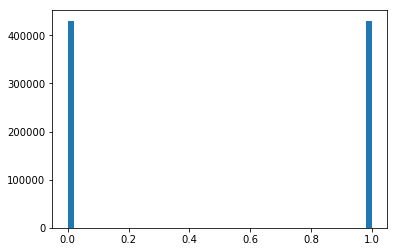

In [86]:
plt.hist(y_train_res, bins = "auto")

Cross validation

In [87]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

C:\Users\30295\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
clf = RandomForestClassifier(n_estimators = 10, min_weight_fraction_leaf = 0.1)
scores = cross_validation.cross_val_score(clf, x_train_res, y_train_res, cv = 5)
scores

array([ 0.79330288,  0.83618144,  0.81516723,  0.81589961,  0.85477965])

In [92]:
clf = RandomForestClassifier(n_estimators = 25, min_weight_fraction_leaf = 0.1, random_state = 12)
scores = cross_validation.cross_val_score(clf, x_train_res, y_train_res, cv = 5)
scores

array([ 0.80869429,  0.86495896,  0.85836017,  0.85876705,  0.85849386])

Training the data with RandomForest

In [93]:
clf_rf = RandomForestClassifier(n_estimators = 25, random_state = 12 )
clf_rf.fit(training_features, training_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [37]:
test_df.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

Make predictions for test data

In [94]:
test_data = test_df.drop(['id'], axis = 1)

In [96]:
predictions = clf_rf.predict_proba(test_data)[:,1]

Submission file

In [97]:
submission = pd.DataFrame({
        "id": test_df["id"],
        "target": predictions.tolist()
    })
submission.to_csv('submission_rf.csv', index=False)